In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np

In [7]:
import random

N = 1000
BATCH_SIZE = 16

input_tensor = torch.from_numpy(np.random.randn(BATCH_SIZE, N, 6))
input_tensor.shape

torch.Size([16, 1000, 6])

In [8]:
input_tensor

tensor([[[-4.8662e-02,  4.5610e-01,  7.5849e-01, -6.6844e-01, -1.3341e+00,
          -1.1276e+00],
         [-8.2324e-01,  1.4886e+00, -2.8042e-01, -6.2625e-01,  2.3411e-01,
           4.2446e-01],
         [ 1.6296e+00, -1.1479e+00,  6.8195e-01,  3.0234e-01, -1.9702e+00,
           3.1512e-01],
         ...,
         [-1.1495e-03,  2.8762e+00,  3.9889e+00,  6.5679e-02, -8.4006e-03,
           6.4628e-02],
         [ 3.7032e-01, -4.8984e-01, -7.1102e-01,  2.0448e+00, -1.4769e+00,
           1.0503e+00],
         [ 5.8644e-01, -1.6471e+00,  7.0661e-01,  3.2984e-01,  5.0743e-01,
          -1.1102e+00]],

        [[-1.6351e+00,  7.9396e-01, -1.3316e-01,  8.4952e-01,  5.2459e-01,
           2.7926e+00],
         [-7.4857e-01, -2.2557e+00, -1.2342e+00, -4.1128e-01, -1.8901e-01,
           8.4099e-01],
         [ 5.3728e-01,  1.5114e+00, -6.1631e-03, -1.7430e+00,  3.9369e-02,
          -2.7631e-01],
         ...,
         [ 7.9584e-01, -6.0985e-01,  4.6350e-01,  1.5528e-01, -1.4785e-02,
    

In [9]:
input_tensor.shape

torch.Size([16, 1000, 6])

In [10]:
HIDDEN_DIM = 8

input_tensor = input_tensor.float().cuda()

lstm = nn.LSTM(input_size=6, hidden_size=HIDDEN_DIM).cuda()

h_0 = Variable(torch.zeros(1, N, HIDDEN_DIM).cuda())
c_0 = Variable(torch.zeros(1, N, HIDDEN_DIM).cuda())

output, (final_hidden_state, final_cell_state) = lstm(input_tensor, (h_0, c_0))

output # (batch_size, N, hidden_dim)

tensor([[[ 0.1247, -0.0652,  0.0201,  ..., -0.0105,  0.0046, -0.0442],
         [-0.0353,  0.0922,  0.1211,  ...,  0.0997,  0.1731, -0.0684],
         [ 0.1805, -0.0493, -0.0285,  ..., -0.0550, -0.0685,  0.2444],
         ...,
         [-0.0625, -0.0224, -0.1575,  ..., -0.0430, -0.0352, -0.0669],
         [ 0.2053, -0.0062,  0.0166,  ...,  0.1175,  0.0891,  0.3206],
         [ 0.1775, -0.1483, -0.0685,  ...,  0.0758, -0.0148,  0.0669]],

        [[ 0.0887,  0.0904,  0.0448,  ...,  0.1209,  0.2378, -0.0486],
         [ 0.2000,  0.0931,  0.0677,  ...,  0.3434,  0.2087,  0.1491],
         [ 0.0672, -0.0762,  0.1291,  ...,  0.0276, -0.0469, -0.0030],
         ...,
         [ 0.1000, -0.0267, -0.0460,  ...,  0.0166,  0.0380,  0.0264],
         [ 0.1528,  0.0670,  0.0469,  ...,  0.0552,  0.2333,  0.0395],
         [ 0.0255, -0.1621,  0.0198,  ...,  0.1150,  0.0241, -0.0140]],

        [[ 0.1525,  0.0755, -0.0461,  ...,  0.1662,  0.1240, -0.0700],
         [ 0.2281,  0.1107,  0.1474,  ...,  0

In [11]:
output.shape

torch.Size([16, 1000, 8])

In [12]:
final_hidden_state.shape

torch.Size([1, 1000, 8])

In [13]:
HIDDEN_FC_DIM = 128
OUTPUT_CLASSES = 6

fc1 = nn.Linear(in_features=HIDDEN_DIM, out_features=HIDDEN_FC_DIM, device='cuda:0')
fc2 = nn.Linear(in_features=HIDDEN_FC_DIM, out_features=OUTPUT_CLASSES, device='cuda:0')

print(fc1)
print(fc2)

Linear(in_features=8, out_features=128, bias=True)
Linear(in_features=128, out_features=6, bias=True)


In [14]:
output_fc1 = fc1(final_hidden_state.cuda())
output_fc2 = fc2(output_fc1)
output_fc2

tensor([[[ 0.1493,  0.0191,  0.0975, -0.0962, -0.1928,  0.0627],
         [ 0.1614,  0.0494,  0.1687, -0.0594, -0.2078,  0.0467],
         [ 0.1394,  0.0243,  0.0994, -0.1109, -0.2258,  0.1081],
         ...,
         [ 0.1713,  0.0505,  0.1278, -0.0695, -0.1238,  0.0808],
         [ 0.1617,  0.0656,  0.1691, -0.1305, -0.2065,  0.0898],
         [ 0.1738,  0.0262,  0.1287, -0.0219, -0.1896,  0.0236]]],
       device='cuda:0', grad_fn=<ViewBackward0>)

In [15]:
final_hidden_state.shape

torch.Size([1, 1000, 8])

In [16]:
output_fc1.shape

torch.Size([1, 1000, 128])

In [17]:
output_fc2.shape

torch.Size([1, 1000, 6])

In [18]:
output_fc2[0]

tensor([[ 0.1493,  0.0191,  0.0975, -0.0962, -0.1928,  0.0627],
        [ 0.1614,  0.0494,  0.1687, -0.0594, -0.2078,  0.0467],
        [ 0.1394,  0.0243,  0.0994, -0.1109, -0.2258,  0.1081],
        ...,
        [ 0.1713,  0.0505,  0.1278, -0.0695, -0.1238,  0.0808],
        [ 0.1617,  0.0656,  0.1691, -0.1305, -0.2065,  0.0898],
        [ 0.1738,  0.0262,  0.1287, -0.0219, -0.1896,  0.0236]],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [19]:
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")

F.softmax(output_fc2[0])

tensor([[0.1909, 0.1676, 0.1813, 0.1494, 0.1356, 0.1751],
        [0.1892, 0.1691, 0.1906, 0.1517, 0.1308, 0.1687],
        [0.1889, 0.1684, 0.1815, 0.1471, 0.1311, 0.1831],
        ...,
        [0.1891, 0.1676, 0.1811, 0.1486, 0.1408, 0.1728],
        [0.1892, 0.1719, 0.1906, 0.1413, 0.1309, 0.1761],
        [0.1924, 0.1660, 0.1839, 0.1582, 0.1338, 0.1656]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [20]:
# softmax
odds = np.exp([-0.1938,  0.0631,  0.1251,  0.0869,  0.0924, -0.1401])
odds / sum(odds)

array([0.13551765, 0.17521291, 0.18641994, 0.179433  , 0.1804226 ,
       0.14299389])

In [21]:
sum([0.13551765, 0.17521291, 0.18641994, 0.179433  , 0.1804226 , 0.14299389])

0.9999999900000001

In [22]:
torch.argmax(output_fc2[0], dim=1)

tensor([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
torch.argmax(output_fc2[0], dim=1).shape

torch.Size([1000])

In [24]:
h = torch.randn((3, 100, 128))
h.shape

torch.Size([3, 100, 128])

In [25]:
h.permute(1, 0, 2).reshape(h.size(1), -1)

tensor([[ 0.8915,  1.7832,  1.6524,  ..., -0.8731,  0.5819, -0.8361],
        [-0.0215, -1.5740, -2.0229,  ...,  1.7967, -1.0117,  0.4433],
        [ 0.9838, -0.0976, -0.6290,  ...,  1.0066,  0.1958,  0.5359],
        ...,
        [-0.4473,  0.9761,  1.1862,  ..., -1.5912,  0.0228,  0.3670],
        [ 0.1478,  0.1996, -0.6642,  ..., -0.5052,  2.0963,  0.0787],
        [ 0.3492,  1.3791, -0.5362,  ...,  0.6132, -0.2500,  0.7660]])

In [26]:
torch.cat((h[-3,:,:], h[-2,:,:], h[-1,:,:]), dim=1)

tensor([[ 0.8915,  1.7832,  1.6524,  ..., -0.8731,  0.5819, -0.8361],
        [-0.0215, -1.5740, -2.0229,  ...,  1.7967, -1.0117,  0.4433],
        [ 0.9838, -0.0976, -0.6290,  ...,  1.0066,  0.1958,  0.5359],
        ...,
        [-0.4473,  0.9761,  1.1862,  ..., -1.5912,  0.0228,  0.3670],
        [ 0.1478,  0.1996, -0.6642,  ..., -0.5052,  2.0963,  0.0787],
        [ 0.3492,  1.3791, -0.5362,  ...,  0.6132, -0.2500,  0.7660]])

In [27]:
from model import LSTMClassifier

In [28]:
SEQUENCE_LEN = 1000
BATCH_SIZE = 64
HIDDEN_DIM = 128
OUTPUT_CLASSES = 6

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_tensor = torch.from_numpy(np.random.randn(BATCH_SIZE, SEQUENCE_LEN, 6))
input_tensor = input_tensor.float().to(device)

In [29]:
model = LSTMClassifier(hidden_size=HIDDEN_DIM,
                       output_size=OUTPUT_CLASSES,
                       device=device)

In [30]:
LR = 0.0001

In [31]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [32]:
model.train()
optimizer.zero_grad()

In [33]:
logits = model(input_tensor)
logits

tensor([[-0.0422,  0.0892, -0.0681,  0.0000, -0.0000,  0.0000],
        [-0.0000,  0.0458, -0.0000,  0.1071, -0.0525,  0.0968],
        [-0.0579,  0.0545, -0.0259,  0.1015, -0.0461,  0.0000],
        [-0.0000,  0.0614, -0.0489,  0.0716, -0.0000,  0.0000],
        [-0.0774,  0.0351, -0.0000,  0.0000, -0.0424,  0.0815],
        [-0.0558,  0.0458, -0.0000,  0.1155, -0.0437,  0.0000],
        [-0.0000,  0.0506, -0.0575,  0.0924, -0.0391,  0.0000],
        [-0.0238,  0.0446, -0.0528,  0.0895, -0.0145,  0.0869],
        [-0.0000,  0.0498, -0.0368,  0.0000, -0.0277,  0.0673],
        [-0.0567,  0.0609, -0.0516,  0.1048, -0.0260,  0.0939],
        [-0.0000,  0.0511, -0.0000,  0.0794, -0.0000,  0.0000],
        [-0.0835,  0.0624, -0.0000,  0.0000, -0.0361,  0.0000],
        [-0.0520,  0.0430, -0.0308,  0.0000, -0.0048,  0.1088],
        [-0.0000,  0.0000, -0.0000,  0.0803, -0.0279,  0.1015],
        [-0.0712,  0.0494, -0.0000,  0.0953, -0.0442,  0.0000],
        [-0.0524,  0.0000, -0.0451,  0.0

In [34]:
logits.shape

torch.Size([64, 6])

In [55]:
preds = torch.argmax(logits.squeeze(1), dim=-1)
preds.shape

torch.Size([64])

In [49]:
y_labels = torch.randint(0, OUTPUT_CLASSES, (BATCH_SIZE,), device=device)
y_labels.shape

torch.Size([64])

In [42]:
input_tensor.shape

torch.Size([64, 1000, 6])

In [50]:
preds.dtype, y_labels.dtype

(torch.int64, torch.int64)

In [58]:
y_preds = torch.tensor(preds.float(), requires_grad=True)
y_labels = y_labels.float()

loss = criterion(y_preds, y_labels)

loss

tensor(-5.1849, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [59]:
loss.backward()
optimizer.step()

In [61]:
print('loss', loss.item())
print(f"acc (in this batch) {(y_preds == y_labels).sum().item()}/{len(y_preds)}")

loss -5.184900283813477
acc (in this batch) 10/64


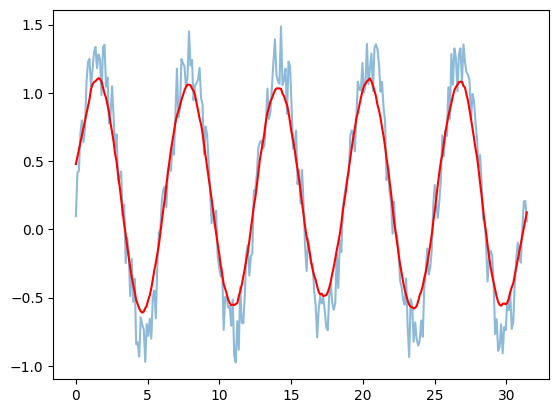

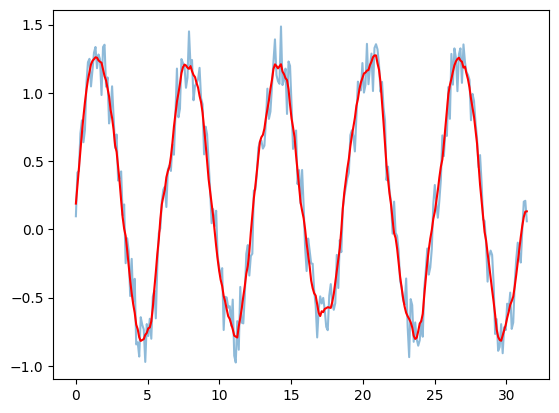

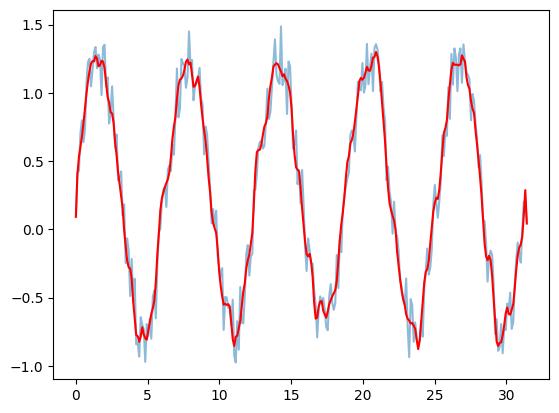

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as smoothen

np.random.seed(1234)
x = np.linspace(0, 10 * np.pi, 300)
y = np.sin(x) + np.random.random(len(x)) * 0.5

for k in [1, 4, 8]:
    yhat = smoothen(y, 20, k) # window size 51, polynomial order k
    plt.plot(x, y, alpha=0.5)
    plt.plot(x, yhat, color='red')
    plt.show()

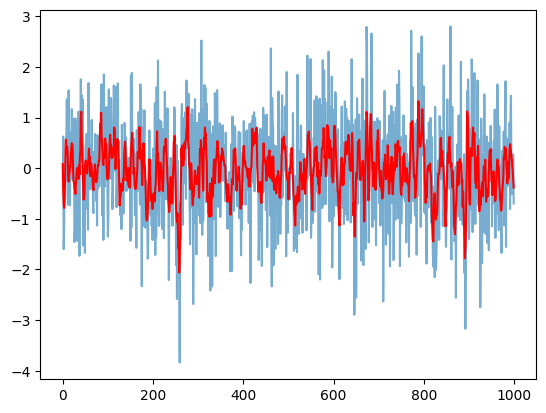

In [105]:
batch_e1 = input_tensor[0, :, 0]
batch_e1_cpu = batch_e1.detach().cpu().numpy()
x = np.arange(len(batch_e1_cpu))
plt.plot(x, batch_e1_cpu, alpha=0.6)
plt.plot(x, smoothen(batch_e1_cpu, 10, 3), color='red')
plt.show()

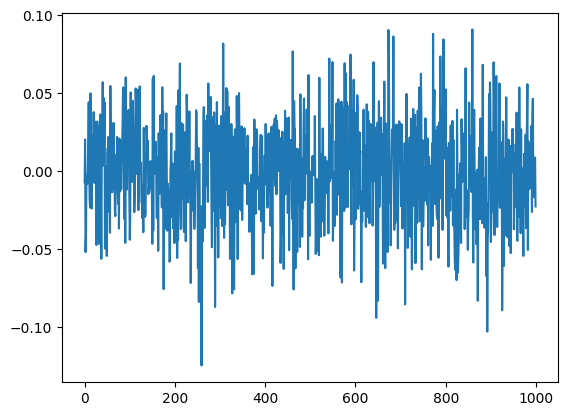

In [109]:
x = np.arange(len(batch_e1_cpu))
y = F.normalize(batch_e1, dim=0).detach().cpu()
plt.plot(x, y)
plt.show()

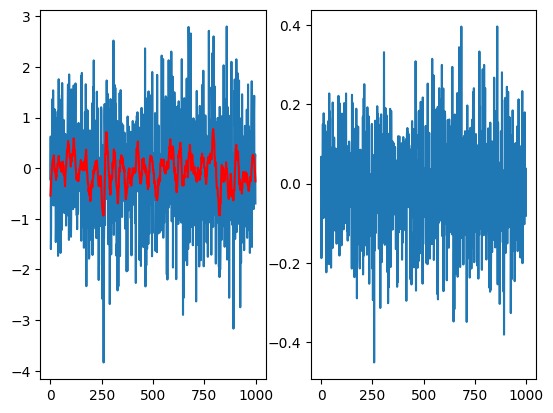

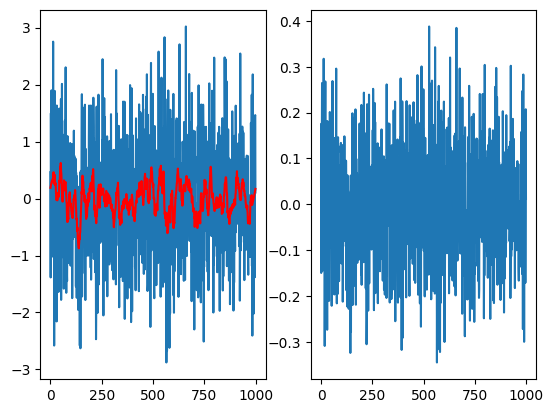

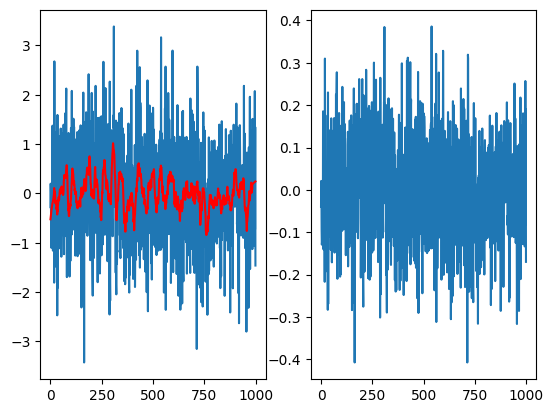

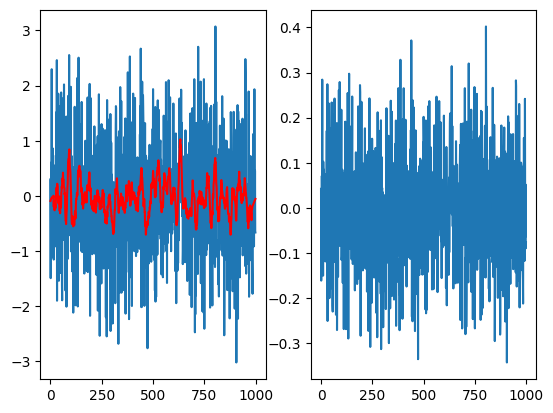

In [122]:
batch = input_tensor[:, :, 0]
batch_n = F.normalize(batch, dim=0)

for i in range(4):
    batch_i = batch[i].detach().cpu()
    batch_in = batch_n[i].detach().cpu()
    x = np.arange(len(batch_in))

    plt.subplot(1, 2, 1)
    plt.plot(x, batch_i)
    plt.plot(x, smoothen(batch_i, 30, 2), color='red')
    plt.subplot(1, 2, 2)
    plt.plot(x, batch_in)
    plt.plot(x, smoothen(batch_in, 30, 2), color='red')
    plt.show()